In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import glob
from scipy import stats
import datetime as dt
from sklearn import model_selection
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense,LSTM

## 10.1 Data Preparation

In [2]:
ACC = pd.read_csv("acceleration.txt", sep = ' ',names=['timedelta', 'accX', 'accY', 'accZ'])
HeartR = pd.read_csv("heartrate.txt", sep = ',',names=['timedelta', 'heartrate'])
SleepL = pd.read_csv("labeled_sleep.txt", sep = ' ',names=['timedelta', 'sleep'])

In [3]:
ACC

,timedelta,accX,accY,accZ
0,-124489.161050,0.017487,-0.586700,-0.805771
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
...,...,...,...,...
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284
981998,17643.026865,0.505737,0.427673,-0.749741


In [4]:
HeartR 

,timedelta,heartrate
0,-556410.36066,57
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
...,...,...
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75
4876,16975.47229,76


In [5]:
SleepL

,timedelta,sleep
0,0,-1
1,30,-1
2,60,-1
3,90,-1
4,120,-1
...,...,...
562,16860,0
563,16890,0
564,16920,0
565,16950,0


In [6]:
# Check ''timedelta' max(), min() of ACC, HeartR, SleepL (ช่วงเวลาที่มีข้อมูลใกล้กัน)
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()
HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()
SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()
print("ACC start:",ACC_min_date,"ACC end:",ACC_max_date)
print("HeartR start:",HeartR_min_date,"HeartR end:",HeartR_max_date)
print("SleepL start:",SleepL_min_date,"SleepL end:",SleepL_max_date)

ACC start: -124489.16105 ACC end: 17643.046417
HeartR start: -556410.36066 HeartR end: 16980.47229
SleepL start: 0 SleepL end: 16980


In [7]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# ACC_new = ACC[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
ACC_new = ACC[(ACC['timedelta'] > ACC_min_date)&(ACC['timedelta'] < ACC_max_date)]
ACC_new

,timedelta,accX,accY,accZ
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
5,-124489.078316,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,17642.946943,0.506226,0.428665,-0.748779
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284


In [8]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# HeartR_new = HeartR[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
HeartR_new = HeartR[(HeartR['timedelta'] > HeartR_min_date)&(HeartR['timedelta'] < HeartR_max_date)]
HeartR_new

,timedelta,heartrate
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
5,-556163.88076,61
...,...,...
4872,16954.47226,73
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75


In [9]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# SleepL_new = SleepL[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
SleepL_new =SleepL[(SleepL['timedelta'] > SleepL_min_date)&(SleepL['timedelta'] <SleepL_max_date)]
SleepL_new

,timedelta,sleep
1,30,-1
2,60,-1
3,90,-1
4,120,-1
5,150,-1
...,...,...
561,16830,0
562,16860,0
563,16890,0
564,16920,0


### Load and Prepare Data (ACC)

In [10]:
# ------------ Rounding ACC (Rounding to 1 sec) -------------------------------#  
# # Convert to datetime and round to second,
ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))
ACC_new

C:\Users\Cherry Labtop\AppData\Local\Temp\ipykernel_13628\3782895249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))


,timedelta,accX,accY,accZ
1,-2 days +13:25:11,0.018982,-0.589676,-0.809158
2,-2 days +13:25:11,0.020966,-0.580887,-0.815048
3,-2 days +13:25:11,0.019485,-0.580872,-0.813583
4,-2 days +13:25:11,0.016998,-0.587204,-0.806259
5,-2 days +13:25:11,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,0 days 04:54:03,0.506226,0.428665,-0.748779
981995,0 days 04:54:03,0.505249,0.425720,-0.748764
981996,0 days 04:54:03,0.508194,0.429138,-0.750717
981997,0 days 04:54:03,0.508179,0.427200,-0.747284


In [11]:
# Average rounding duplicated time
df_acc_X = ACC_new.groupby('timedelta')['accX'].mean()
df_acc_Y = ACC_new.groupby('timedelta')['accY'].mean()
df_acc_Z = ACC_new.groupby('timedelta')['accZ'].mean()

In [12]:
df_acc_X

timedelta
-2 days +13:25:11    0.016081
-2 days +13:25:12    0.038944
-2 days +13:25:13    0.022542
-2 days +13:25:14    0.017970
-2 days +13:25:15    0.038620
                       ...   
0 days 04:53:59      0.504763
0 days 04:54:00      0.502466
0 days 04:54:01      0.502944
0 days 04:54:02      0.506228
0 days 04:54:03      0.506454
Name: accX, Length: 19593, dtype: float64

In [13]:
df_acc_Y

timedelta
-2 days +13:25:11   -0.585817
-2 days +13:25:12   -0.578258
-2 days +13:25:13   -0.567728
-2 days +13:25:14   -0.570523
-2 days +13:25:15   -0.565942
                       ...   
0 days 04:53:59      0.430875
0 days 04:54:00      0.428149
0 days 04:54:01      0.428004
0 days 04:54:02      0.428170
0 days 04:54:03      0.428505
Name: accY, Length: 19593, dtype: float64

In [14]:
df_acc_Z

timedelta
-2 days +13:25:11   -0.811041
-2 days +13:25:12   -0.818431
-2 days +13:25:13   -0.825828
-2 days +13:25:14   -0.821320
-2 days +13:25:15   -0.827241
                       ...   
0 days 04:53:59     -0.747636
0 days 04:54:00     -0.750749
0 days 04:54:01     -0.750483
0 days 04:54:02     -0.748264
0 days 04:54:03     -0.748301
Name: accZ, Length: 19593, dtype: float64

In [15]:
# acc_X, acc_Y, acc_Z
ACC_new2 = pd.concat([df_acc_X, df_acc_Y, df_acc_Z], axis=1).reset_index()
ACC_new2

,timedelta,accX,accY,accZ
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241
...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636
19589,0 days 04:54:00,0.502466,0.428149,-0.750749
19590,0 days 04:54:01,0.502944,0.428004,-0.750483
19591,0 days 04:54:02,0.506228,0.428170,-0.748264


### Load and Prepare Data (Heart Rate)

In [16]:
# ------------ Rounding Heart Rate (Rounding to 1 sec) -------------------------------
HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))
# HeartR_new['timedelta'] = HeartR_new['timedelta'] - HeartR_new['timedelta'].min()
HeartR_new

C:\Users\Cherry Labtop\AppData\Local\Temp\ipykernel_13628\786107525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))


,timedelta,heartrate
1,-7 days +13:26:32,56
2,-7 days +13:26:37,56
3,-7 days +13:26:41,57
4,-7 days +13:26:51,59
5,-7 days +13:30:36,61
...,...,...
4872,0 days 04:42:34,73
4873,0 days 04:42:39,72
4874,0 days 04:42:44,74
4875,0 days 04:42:50,75


In [17]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()
HeartR_new2

,heartrate
timedelta,
-7 days +13:26:32,56.0
-7 days +13:26:33,56.0
-7 days +13:26:34,56.0
-7 days +13:26:35,56.0
-7 days +13:26:36,56.0
...,...
0 days 04:42:51,75.0
0 days 04:42:52,75.0
0 days 04:42:53,75.0


### Load and Prepare Data (Sleep Label)

In [18]:
# ------------ Rounding Sleep Label (Rounding to 1 sec) -------------------------------
SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))
# SleepL_new['timedelta'] = SleepL_new['timedelta'] - SleepL_new['timedelta'].min()
SleepL_new

C:\Users\Cherry Labtop\AppData\Local\Temp\ipykernel_13628\3998733642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))


,timedelta,sleep
1,0 days 00:00:30,-1
2,0 days 00:01:00,-1
3,0 days 00:01:30,-1
4,0 days 00:02:00,-1
5,0 days 00:02:30,-1
...,...,...
561,0 days 04:40:30,0
562,0 days 04:41:00,0
563,0 days 04:41:30,0
564,0 days 04:42:00,0


In [19]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()
SleepL_new2

,sleep
timedelta,
0 days 00:00:30,-1.0
0 days 00:00:31,-1.0
0 days 00:00:32,-1.0
0 days 00:00:33,-1.0
0 days 00:00:34,-1.0
...,...
0 days 04:42:26,0.0
0 days 04:42:27,0.0
0 days 04:42:28,0.0


## Merge Data and Standardized data

In [20]:
# ------------Merge All Data -------------------------------
df = []
df = pd.merge_asof(ACC_new2, HeartR_new2, on='timedelta')
df = pd.merge_asof(df, SleepL_new2, on = 'timedelta')
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [21]:
#Fill NA
#Heart rate
df['heartrate'].fillna(df['heartrate'].median(),inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [22]:
#Fill NA
#Sleep Label
df['sleep'].fillna(0,inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,0.0
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,0.0
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,0.0
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,0.0
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [23]:
#Drop Column
df.drop(columns='timedelta')

,accX,accY,accZ,heartrate,sleep
0,0.016081,-0.585817,-0.811041,86.0,0.0
1,0.038944,-0.578258,-0.818431,86.0,0.0
2,0.022542,-0.567728,-0.825828,86.0,0.0
3,0.017970,-0.570523,-0.821320,86.0,0.0
4,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...
19588,0.504763,0.430875,-0.747636,76.0,0.0
19589,0.502466,0.428149,-0.750749,76.0,0.0
19590,0.502944,0.428004,-0.750483,76.0,0.0
19591,0.506228,0.428170,-0.748264,76.0,0.0


In [24]:
# Standardized data
scaler = preprocessing.StandardScaler()
feature_columns = df[['accX', 'accY', 'accZ', 'heartrate']]
label_columns = df[['sleep']]
df_feature = pd.DataFrame(scaler.fit_transform(feature_columns.values),index = feature_columns.index,columns=feature_columns.columns)
df_feature

,accX,accY,accZ,heartrate
0,0.067321,-1.272417,-0.730280,0.684847
1,0.124300,-1.251807,-0.739550,0.684847
2,0.083422,-1.223095,-0.748830,0.684847
3,0.072028,-1.230717,-0.743175,0.684847
4,0.123492,-1.218226,-0.750602,0.684847
...,...,...,...,...
19588,1.285227,1.499704,-0.650738,-0.652200
19589,1.279502,1.492272,-0.654644,-0.652200
19590,1.280695,1.491878,-0.654310,-0.652200
19591,1.288878,1.492329,-0.651526,-0.652200


In [25]:
df_label = label_columns
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19588,0.0
19589,0.0
19590,0.0
19591,0.0


In [26]:
df_label.replace(-1,0,inplace=True)

C:\Users\Cherry Labtop\AppData\Local\Temp\ipykernel_13628\30520036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label.replace(-1,0,inplace=True)


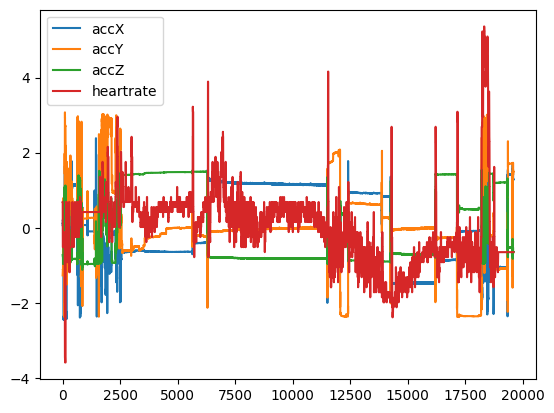

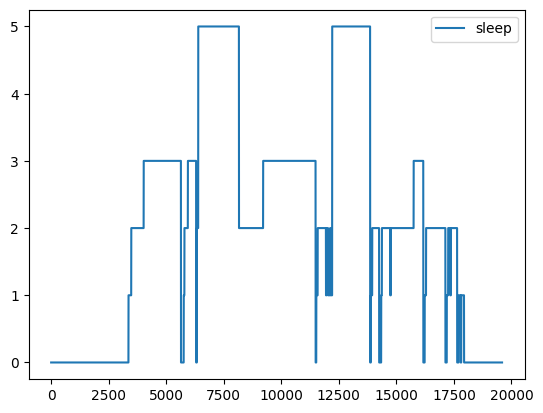

In [27]:
# Visualize signals
df_feature.plot(), df_label.plot()
plt.show()

## 10.1.2 Simple Moving Average (SMA) and Create 2D feature

In [28]:
df_feature_SMA = df_feature.copy()
df_feature_SMA

,accX,accY,accZ,heartrate
0,0.067321,-1.272417,-0.730280,0.684847
1,0.124300,-1.251807,-0.739550,0.684847
2,0.083422,-1.223095,-0.748830,0.684847
3,0.072028,-1.230717,-0.743175,0.684847
4,0.123492,-1.218226,-0.750602,0.684847
...,...,...,...,...
19588,1.285227,1.499704,-0.650738,-0.652200
19589,1.279502,1.492272,-0.654644,-0.652200
19590,1.280695,1.491878,-0.654310,-0.652200
19591,1.288878,1.492329,-0.651526,-0.652200


In [29]:
# ------------Simple Moving Average (SMA) ------------------------------
# columns=['accX', 'accY', 'accZ', 'heartrate']

df_feature_SMA['accX'] = df_feature['accX'].rolling(5,min_periods=1).mean() #ตัดมา 5 ตัวแล้วหาค่าเฉลี่ย
df_feature_SMA['accY'] = df_feature['accY'].rolling(5, min_periods=1).mean()
df_feature_SMA['accZ'] = df_feature['accZ'].rolling(5, min_periods=1).mean()
df_feature_SMA['heartrate'] = df_feature['heartrate'].rolling(5, min_periods=1).mean()

In [30]:
df_feature_SMA

,accX,accY,accZ,heartrate
0,0.067321,-1.272417,-0.730280,0.684847
1,0.095810,-1.262112,-0.734915,0.684847
2,0.091681,-1.249106,-0.739553,0.684847
3,0.086768,-1.244509,-0.740459,0.684847
4,0.094112,-1.239252,-0.742487,0.684847
...,...,...,...,...
19588,1.284397,1.502859,-0.650199,-0.652200
19589,1.283592,1.500659,-0.651053,-0.652200
19590,1.283922,1.498356,-0.651657,-0.652200
19591,1.285128,1.496025,-0.651757,-0.652200


In [31]:
slidingW = 100
Stride_step = 5 #slide ทีละ 5
n_features = 4 #number of colums form df_feature
df_feature2D = np.array([],ndmin=1)
df_label_new = np.array([])
df_feature2D_T = np.array([],ndmin=1)

for t in range(0 , len(df_feature), Stride_step ):

    F2d = np.array(df_feature[t:t+slidingW],ndmin=1)
    if len(F2d) <slidingW:
        break # ถ้าไม่ครบ 100 ให้หยุด
    F2d_T = F2d.transpose()

    if df_feature2D.size == 0 :
        df_feature2D = F2d
        df_feature2D_T = F2d_T
    else:
        df_feature2D = np.dstack((df_feature2D,F2d))
        df_feature2D_T = np.dstack((df_feature2D_T, F2d_T))
    


    Labels = stats.mode(df_label[t : t+slidingW])
    # print(Labels)
    df_label_new = np.append(df_label_new,Labels[0])



df_feature2D = np.swapaxes(df_feature2D,0,2)
df_feature2D_T = np.swapaxes(df_feature2D_T,0,2)
print(df_feature2D.shape)
print(df_label_new.shape)
print(df_feature2D_T.shape)

C:\Users\Cherry Labtop\AppData\Local\Temp\ipykernel_13628\607937471.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Labels = stats.mode(df_label[t : t+slidingW])


(3899, 4, 100)
(3899,)
(3899, 100, 4)


In [32]:
# ------------ Option#1: no transpose Train-Test-Split 2D features -------------------------------
seed = 26
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_feature2D,df_label_new,test_size = 0.3, random_state=seed)

In [33]:
# ------------ Train-Test-Split 2D features -------------------------------
xT_train, xT_test, yT_train, yT_test =  model_selection.train_test_split( df_feature2D_T,df_label_new,test_size = 0.3, random_state=seed)

## 10.2 LSTM Model Training and Testing

In [34]:
# ------------ LSTM Architecture parameter -------------------------------
# Nlayer (LSTM, dense), Nnode, Activation
LSTM_L1 = 100 # try 200, 300, 400, 500, 1000
LSTM_L2 = 50 # try 50, 100, 150, 200, 250, 300
dropRate_L1 = 0.25
dropRate_L2 = 0.5
D_out = 5
Activation = "softmax"
n_classes = 6

# try
#Option #1:
inRow1 = n_features
inCol1 = slidingW
Input_shape1 = (inRow1, inCol1)
# Option #2
inRow2 = slidingW
inCol2 = n_features
Input_shape2 = (inRow2, inCol2)

In [35]:
# ------------ Create LSTM Model -------------------------------
model = models.Sequential()
model.add(LSTM( LSTM_L1, return_sequences=True, input_shape=Input_shape1))
model.add(Dropout(dropRate_L1 ))
model.add(LSTM(LSTM_L2))
model.add(Dropout(dropRate_L2))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 4, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                                 
Total params: 110,906
Trainable params: 110,906
Non-trainable params: 0
_________________________________________________________________


In [36]:
# ------------ Create Optimizer -------------------------------
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

In [37]:
# ------ Train CNN using 2D feature--------------------------------------------
# Training the model
EP = 50
batch_size = 100 # try 20, 40, 60, 80, 100
history = model.fit( X_train, Y_train, batch_size = batch_size, validation_data=(X_test, Y_test), epochs=EP)

Epoch 1/50
28/28 [==============================] - 4s 37ms/step - loss: 1.4694 - acc: 0.4020 - val_loss: 1.1829 - val_acc: 0.4385
Epoch 2/50
28/28 [==============================] - 0s 11ms/step - loss: 1.2047 - acc: 0.5049 - val_loss: 0.9992 - val_acc: 0.6265
Epoch 3/50
28/28 [==============================] - 0s 11ms/step - loss: 0.9989 - acc: 0.6215 - val_loss: 0.7730 - val_acc: 0.6906
Epoch 4/50
28/28 [==============================] - 0s 11ms/step - loss: 0.8040 - acc: 0.6918 - val_loss: 0.6635 - val_acc: 0.7359
Epoch 5/50
28/28 [==============================] - 0s 11ms/step - loss: 0.7071 - acc: 0.7303 - val_loss: 0.5931 - val_acc: 0.7735
Epoch 6/50
28/28 [==============================] - 0s 11ms/step - loss: 0.6398 - acc: 0.7611 - val_loss: 0.5441 - val_acc: 0.7863
Epoch 7/50
28/28 [==============================] - 0s 11ms/step - loss: 0.6002 - acc: 0.7567 - val_loss: 0.4962 - val_acc: 0.8077
Epoch 8/50
28/28 [==============================] - 0s 11ms/step - loss: 0.5585 - a

In [38]:
# ------------ Create LSTM Model -------------------------------
modelT = models.Sequential()
modelT.add(LSTM( LSTM_L1, return_sequences=True, input_shape=Input_shape2))
modelT.add(Dropout(dropRate_L1 ))
modelT.add(LSTM(LSTM_L2))
modelT.add(Dropout(dropRate_L2))
modelT.add(Dense(n_classes, activation='softmax'))
modelT.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 100)          42000     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 306       
                                                                 
Total params: 72,506
Trainable params: 72,506
Non-trainable params: 0
_________________________________________________________________


In [39]:
modelT.compile( optimizer='adam', loss="sparse_categorical_crossentropy",metrics=["acc"])

In [40]:
# ------ Train CNN using 2D feature--------------------------------------------
# Training the model
EP = 50
batch_size = 100 # try 20, 40, 60, 80, 100
historyT = modelT.fit( xT_train, yT_train, batch_size = batch_size, validation_data=(xT_test, yT_test), epochs=EP)

Epoch 1/50
28/28 [==============================] - 10s 236ms/step - loss: 1.3841 - acc: 0.4503 - val_loss: 0.9511 - val_acc: 0.6274
Epoch 2/50
28/28 [==============================] - 6s 215ms/step - loss: 0.9608 - acc: 0.6039 - val_loss: 0.8381 - val_acc: 0.6718
Epoch 3/50
28/28 [==============================] - 6s 220ms/step - loss: 0.8055 - acc: 0.6779 - val_loss: 0.6989 - val_acc: 0.7214
Epoch 4/50
28/28 [==============================] - 6s 217ms/step - loss: 0.7531 - acc: 0.6944 - val_loss: 0.6031 - val_acc: 0.7667
Epoch 5/50
28/28 [==============================] - 6s 215ms/step - loss: 0.7098 - acc: 0.7047 - val_loss: 0.5945 - val_acc: 0.7299
Epoch 6/50
28/28 [==============================] - 6s 211ms/step - loss: 0.6681 - acc: 0.7274 - val_loss: 0.5423 - val_acc: 0.7957
Epoch 7/50
28/28 [==============================] - 6s 204ms/step - loss: 0.6622 - acc: 0.7354 - val_loss: 0.5456 - val_acc: 0.7632
Epoch 8/50
28/28 [==============================] - 6s 209ms/step - loss: 0

## 10.3 Performnace of LSTM Model

In [ ]:
#LSTM prediction for Option #1 and Option #2
LSTM_pred = model.predict(X_test)
# Get classID from max prob(LSTM_pred)
df_pred = pd.DataFrame(LSTM_pred)
# df_class => use dataframe -> idxmax(axis=1)
df_pred

37/37 [==============================] - 1s 3ms/step


,0,1,2,3,4,5
0,8.572637e-07,2.970419e-07,1.351353e-03,9.986470e-01,1.678264e-07,3.024871e-07
1,9.999791e-01,4.087960e-07,9.710933e-08,1.963654e-05,1.551871e-07,5.017762e-07
2,1.311871e-06,6.057129e-06,9.999838e-01,8.637098e-06,5.143720e-11,1.805915e-07
3,9.998298e-01,1.037481e-04,3.567939e-06,7.344229e-06,1.081329e-08,5.553502e-05
4,2.419592e-06,7.654617e-07,1.867352e-02,9.813187e-01,4.551528e-07,4.095833e-06
...,...,...,...,...,...,...
1165,2.035073e-07,7.313285e-08,2.949069e-04,9.997045e-01,1.323000e-07,1.025147e-07
1166,2.091623e-07,6.371691e-08,2.670953e-04,9.997323e-01,1.165915e-07,9.688132e-08
1167,9.875836e-06,1.120487e-07,1.194120e-05,1.031954e-05,5.343314e-07,9.999672e-01
1168,9.999996e-01,4.502343e-08,1.655812e-07,3.925224e-08,1.646775e-11,1.331471e-07


In [ ]:
#LSTM prediction for Option #1 and Option #2
LSTM_pred_T = modelT.predict(xT_test)
# Get classID from max prob(LSTM_pred)
df_pred_T = pd.DataFrame(LSTM_pred_T)
# df_class => use dataframe -> idxmax(axis=1)
df_pred_T

37/37 [==============================] - 2s 27ms/step


,0,1,2,3,4,5
0,0.000150,0.000047,0.094780,0.902700,1.045640e-06,0.002321
1,0.999938,0.000015,0.000022,0.000003,4.273074e-09,0.000022
2,0.000223,0.000157,0.999543,0.000071,1.807985e-09,0.000005
3,0.999800,0.000050,0.000095,0.000007,4.170488e-09,0.000048
4,0.000332,0.000005,0.001271,0.998345,2.832736e-08,0.000048
...,...,...,...,...,...,...
1165,0.000076,0.000054,0.231204,0.767710,2.177866e-06,0.000954
1166,0.000074,0.000045,0.209813,0.789190,1.802284e-06,0.000876
1167,0.000125,0.000011,0.000163,0.000500,1.402121e-06,0.999199
1168,0.999922,0.000033,0.000032,0.000003,2.614368e-09,0.000011


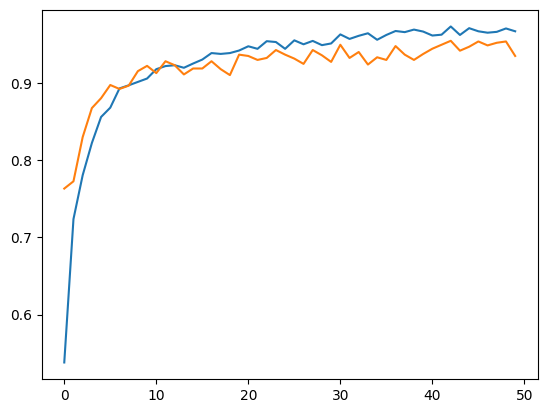

In [ ]:
# ------ View History Graph -------------------------------------------
# View Accuracy Graph, Loss Graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


In [ ]:
print(history.history['val_loss'])

[0.7269681692123413, 0.5660091042518616, 0.455761194229126, 0.35717716813087463, 0.303360253572464, 0.27998775243759155, 0.2610788941383362, 0.2740439474582672, 0.2101677805185318, 0.2191847264766693, 0.20879103243350983, 0.1954730898141861, 0.2145089954137802, 0.21152959764003754, 0.19789594411849976, 0.194553405046463, 0.17678429186344147, 0.1977642923593521, 0.23361970484256744, 0.16555708646774292, 0.16719426214694977, 0.17068380117416382, 0.18226298689842224, 0.1595476120710373, 0.1898990124464035, 0.20235416293144226, 0.20090508460998535, 0.1549779325723648, 0.19131706655025482, 0.17172333598136902, 0.1624254435300827, 0.1917133629322052, 0.19126610457897186, 0.19982950389385223, 0.1845809668302536, 0.16796165704727173, 0.14907202124595642, 0.17626705765724182, 0.21410416066646576, 0.17338763177394867, 0.20263782143592834, 0.14159716665744781, 0.14888246357440948, 0.16289600729942322, 0.1570819765329361, 0.16378818452358246, 0.16994407773017883, 0.16928310692310333, 0.15574343502

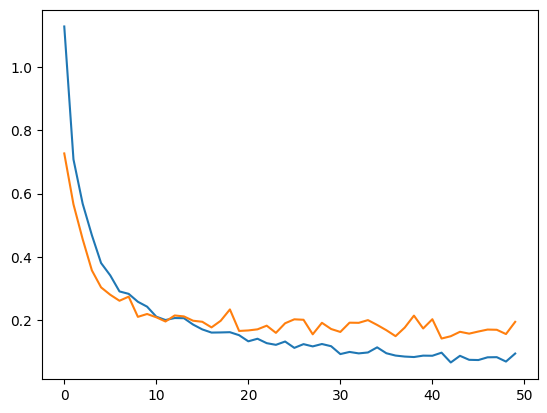

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

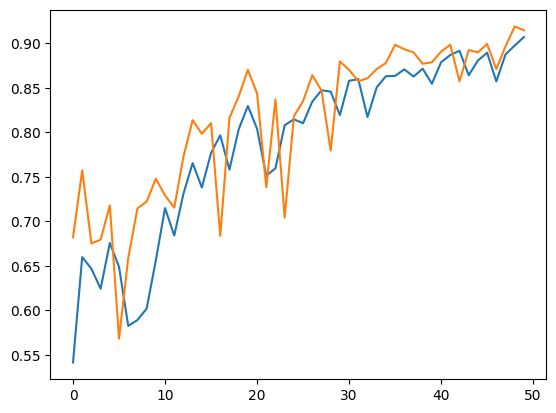

In [ ]:
plt.plot(historyT.history['acc'])
plt.plot(historyT.history['val_acc'])

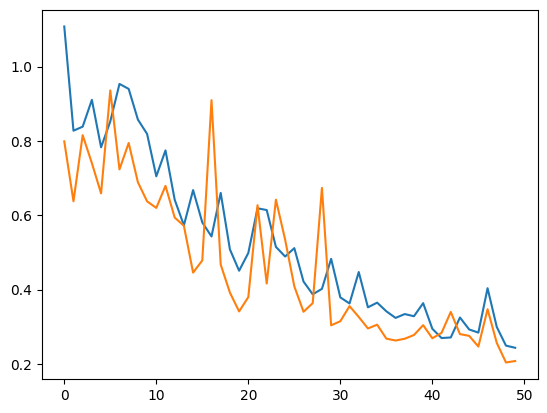

In [ ]:
plt.plot(historyT.history['loss'])
plt.plot(historyT.history['val_loss'])